<a href="https://colab.research.google.com/github/ManasaR08/Tensorflow/blob/main/Reducing_Overfitting_13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Reducing Overfitting (Regularization)

* Add data augmentation
* Add regularization layers (MaxPool2D)
* Add more data

### MaxPool Layer

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
%cd /content/gdrive/My\ Drive/Food101

/content/gdrive/My Drive/Food101


In [ ]:
%cd data_experiment

/content/gdrive/My Drive/Food101/data_experiment


In [ ]:
%cd train

/content/gdrive/My Drive/Food101/data_experiment/train


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

tf.random.set_seed(42)

train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

train_dir = "/content/gdrive/My Drive/Food101/data_experiment/train/"
test_dir = "/content/gdrive/My Drive/Food101/data_experiment/val/"

train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode="binary",
                                               seed=42)
valid_data = valid_datagen.flow_from_directory(test_dir,
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode="binary",
                                               seed=42)

Found 1600 images belonging to 2 classes.
Found 400 images belonging to 2 classes.


In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense
model_2 = Sequential([
                      Conv2D(10, 3, activation="relu", input_shape=(224,224,3)),
                      MaxPool2D(pool_size=2),
                      Conv2D(10, 3, activation="relu"),
                      MaxPool2D(),
                      Conv2D(10, 3, activation="relu"),
                      MaxPool2D(),
                      Flatten(),
                      Dense(1, activation="sigmoid")
                      ])

In [ ]:
from keras.optimizers import Adam
model_2.compile(loss="binary_crossentropy",
                optimizer = Adam(),
                metrics=["accuracy"])

In [ ]:
history_2 = model_2.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
50/50 [==============================] - 1260s 25s/step - loss: 0.6531 - accuracy: 0.5942 - val_loss: 0.4760 - val_accuracy: 0.7850
Epoch 2/5
50/50 [==============================] - 13s 267ms/step - loss: 0.4958 - accuracy: 0.7658 - val_loss: 0.4384 - val_accuracy: 0.8175
Epoch 3/5
50/50 [==============================] - 13s 266ms/step - loss: 0.4333 - accuracy: 0.8038 - val_loss: 0.4186 - val_accuracy: 0.8100
Epoch 4/5
50/50 [==============================] - 13s 270ms/step - loss: 0.3867 - accuracy: 0.8335 - val_loss: 0.4348 - val_accuracy: 0.8075
Epoch 5/5
50/50 [==============================] - 13s 268ms/step - loss: 0.3433 - accuracy: 0.8638 - val_loss: 0.3692 - val_accuracy: 0.8450


In [ ]:
model_2.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 10)      280       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 10)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 109, 109, 10)      910       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 10)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 52, 52, 10)        910       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 26, 26, 10)        0         
_________________________________________________________________
flatten (Flatten)            (None, 6760)              0

#### The number of parameters have drastically reduced.

In [ ]:
import matplotlib.pyplot as plt
def plot_loss_curves(history):
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"]))

  plt.plot(epochs, loss, label="training_loss")
  plt.plot(epochs, val_loss, label="val_loss")
  plt.title("Loss")
  plt.xlabel("epochs")
  plt.legend()

  plt.figure()
  plt.plot(epochs, accuracy, label="accuravy")
  plt.plot(epochs, val_accuracy, label="val_accuracy")
  plt.title("Accuracy")
  plt.xlabel("epochs")
  plt.legend()


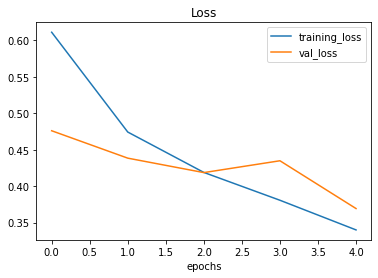

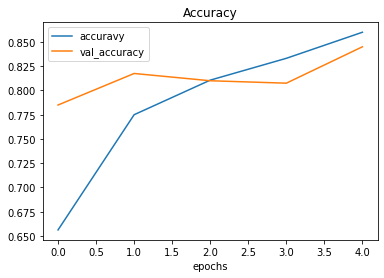

In [ ]:
plot_loss_curves(history_2)

The val_loss curve is better than before

### Data Augmentation

In [ ]:
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=0.2,
                                             shear_range=0.2,
                                             zoom_range=0.2,
                                             width_shift_range=0.2,
                                             height_shift_range=0.3,
                                             horizontal_flip=True)

In [ ]:
model_3 = Sequential([
                      Conv2D(10, 3, activation="relu", input_shape=(224,224,3)),
                      MaxPool2D(pool_size=2),
                      Conv2D(10, 3, activation="relu"),
                      MaxPool2D(),
                      Conv2D(10, 3, activation="relu"),
                      MaxPool2D(),
                      Flatten(),
                      Dense(1, activation="sigmoid")
                      ])

In [ ]:
model_3.compile(loss="binary_crossentropy",
                optimizer = Adam(),
                metrics=["accuracy"])

In [ ]:
train_data_augmented = train_datagen_augmented.flow_from_directory(directory=train_dir,
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode="binary",
                                               seed=42)

Found 1600 images belonging to 2 classes.


In [ ]:
history_3 = model_3.fit(train_data_augmented,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
50/50 [==============================] - 30s 598ms/step - loss: 0.6794 - accuracy: 0.5616 - val_loss: 0.5410 - val_accuracy: 0.7400
Epoch 2/5
50/50 [==============================] - 29s 591ms/step - loss: 0.5932 - accuracy: 0.6809 - val_loss: 0.4561 - val_accuracy: 0.7925
Epoch 3/5
50/50 [==============================] - 29s 596ms/step - loss: 0.5198 - accuracy: 0.7337 - val_loss: 0.4572 - val_accuracy: 0.7900
Epoch 4/5
50/50 [==============================] - 29s 593ms/step - loss: 0.4957 - accuracy: 0.7655 - val_loss: 0.4959 - val_accuracy: 0.7550
Epoch 5/5
50/50 [==============================] - 29s 595ms/step - loss: 0.4729 - accuracy: 0.7820 - val_loss: 0.4345 - val_accuracy: 0.8100


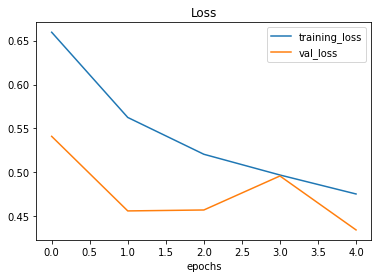

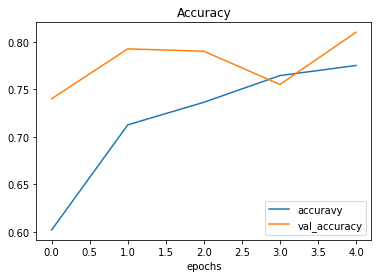

In [ ]:
plot_loss_curves(history_3)